# Sieci konwolucyjne

1. Zapisz wymiary wejść i wyjść każdej warstwy w poniższych sieciach konwolucyjnych. Oblicz sumaryczną liczbę parametrów sieci.
    - Sieć 1:
        - Wejście (obraz 8x8x3)
        - Warstwa konwolucyjna (12 filtrów 3x3, padding=valid)
        - Warstwa konwolucyjna (6 filtrów 3x3, padding=same)
        - Warstwa zbierająca (2x2)
    - Sieć 2:
        - Wejście (obraz 32x32x3)
        - Warstwa konwolucyjna (20 filtrów 5x5, padding=valid)
        - Warstwa zbierająca (2x2)
        - Warstwa konwolucyjna (10 filtrów 3x3, padding=valid)
        - Warstwa zbierająca (2x2)
        - Warstwa spłaszczająca
        - Warstwa gęsta (10)
2. Stwórz sieć konwolucyjną do klasyfikacji zbioru MNIST, np. modyfikując przykład poniżej. Stwórz wykres krzywych uczenia dla danych treningowych/walidacyjnych. Porównaj działanie sieci konwolucyjnej ze siecią gęstą stworzoną na wcześniejszych ćwiczeniach. Weź pod uwagę m.in. liczbę parametrów, czas trenowania, jakość klasyfikacji.

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,810 (89.10 KB)

 Trainable params: 22,810 (89.10 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=3)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9301 - loss: 0.2262 - val_accuracy: 0.9812 - val_loss: 0.0671
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9838 - loss: 0.0514 - val_accuracy: 0.9802 - val_loss: 0.0708
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9880 - loss: 0.0375 - val_accuracy: 0.9862 - val_loss: 0.0536


# Ja
MNIST jest mały, więc 32–64 to rozsądny kompromis między dokładnością a przeuczeniem.


Adam lr=0.001 – stabilniejszy i częściej osiąga wyższą walidacyjną

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,434 (232.16 KB)

 Trainable params: 59,434 (232.16 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9872 - val_loss: 0.0616
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9976 - loss: 0.0065 - val_accuracy: 0.9885 - val_loss: 0.0604
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy: 0.9885 - val_loss: 0.0594
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9875 - val_loss: 0.0736
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9877 - val_loss: 0.0699
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9867 - val_loss: 0.0808
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9873 - val_loss: 0.0840
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9983 - loss: 0.0047 - 

porównanie z gęstą siecią z poprzenich zajęć:

Epoch 1/40
15/15 - 2s - 124ms/step - accuracy: 0.4988 - loss: 2.8128 - val_accuracy: 0.6422 - val_loss: 1.8433
Epoch 2/40
15/15 - 1s - 59ms/step - accuracy: 0.7223 - loss: 1.3627 - val_accuracy: 0.7229 - val_loss: 1.3021
Epoch 3/40
15/15 - 1s - 61ms/step - accuracy: 0.8145 - loss: 0.8727 - val_accuracy: 0.7618 - val_loss: 1.1127
Epoch 4/40
15/15 - 1s - 61ms/step - accuracy: 0.8845 - loss: 0.5664 - val_accuracy: 0.7780 - val_loss: 1.0112
Epoch 5/40
15/15 - 1s - 55ms/step - accuracy: 0.9272 - loss: 0.3641 - val_accuracy: 0.7924 - val_loss: 0.9663
Epoch 6/40
15/15 - 1s - 56ms/step - accuracy: 0.9452 - loss: 0.2423 - val_accuracy: 0.7941 - val_loss: 0.9751
Epoch 7/40
15/15 - 1s - 57ms/step - accuracy: 0.9562 - loss: 0.1774 - val_accuracy: 0.7924 - val_loss: 0.9834
Epoch 8/40
15/15 - 1s - 58ms/step - accuracy: 0.9589 - loss: 0.1374 - val_accuracy: 0.7974 - val_loss: 1.0119
Epoch 9/40
15/15 - 1s - 64ms/step - accuracy: 0.9624 - loss: 0.1199 - val_accuracy: 0.7986 - val_loss: 1.0204
Epoch 10/40
15/15 - 1s - 65ms/step - accuracy: 0.9628 - loss: 0.1101 - val_accuracy: 0.7941 - val_loss: 1.0476
Epoch 11/40
15/15 - 1s - 59ms/step - accuracy: 0.9628 - loss: 0.1019 - val_accuracy: 0.7913 - val_loss: 1.1004
Epoch 12/40
15/15 - 1s - 58ms/step - accuracy: 0.9651 - loss: 0.0981 - val_accuracy: 0.7874 - val_loss: 1.1139
Epoch 13/40
15/15 - 1s - 61ms/step - accuracy: 0.9660 - loss: 0.0965 - val_accuracy: 0.7919 - val_loss: 1.1243

teraz:
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9872 - val_loss: 0.0616
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9976 - loss: 0.0065 - val_accuracy: 0.9885 - val_loss: 0.0604
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9979 - loss: 0.0057 - val_accuracy: 0.9885 - val_loss: 0.0594
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9875 - val_loss: 0.0736
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9877 - val_loss: 0.0699
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.9986 - loss: 0.0040 - val_accuracy: 0.9867 - val_loss: 0.0808
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9984 - loss: 0.0051 - val_accuracy: 0.9873 - val_loss: 0.0840
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9983 - loss: 0.0047 - val_accuracy: 0.9870 - val_loss: 0.0758
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9865 - val_loss: 0.0824
Epoch 10/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9883 - val_loss: 0.0683


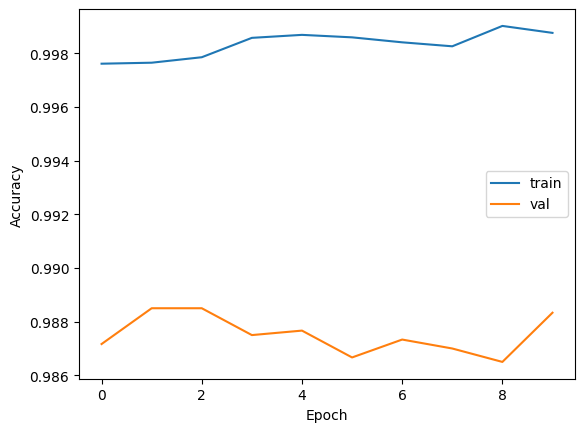

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
